# Simulated Annealing Prototypical Code

# 1.) Generate clusters for validating code

K-means clustering on the scikitlearn iris dataset. 

(150, 4)


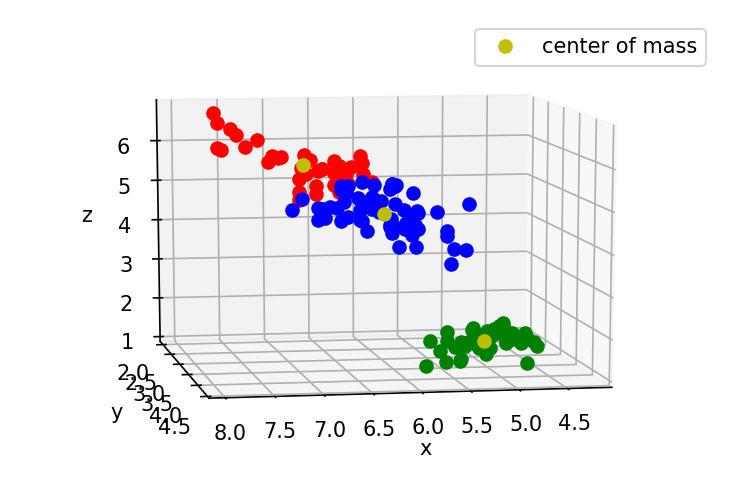

In [64]:
#Credit: Tanya Nesterova, github: @tanyanes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import random

random.seed(2650)

wine=load_iris()
X=wine.data
print(X.shape)


kmData = KMeans(n_clusters = 3,n_init=10)
kmData.fit(X)
#these are which cluster per data point
assignments = kmData.predict(X)
#These are the optimized 'means' per cluster
clusterCenters = kmData.cluster_centers_

cluster1=[]
cluster2=[]
cluster3=[]
for i in range(len(X[:,0])):
    if(assignments[i] == 0):
        cluster1.append(X[i,:])
    if(assignments[i] == 1):
        cluster2.append(X[i,:])
    if(assignments[i] == 2):
        cluster3.append(X[i,:])

C = np.array(clusterCenters)

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)

ax.plot(cluster1[:,0],cluster1[:,1],cluster1[:,2],'o',color='r')
ax.plot(cluster2[:,0],cluster2[:,1],cluster2[:,2],'o',color='g')
ax.plot(cluster3[:,0],cluster3[:,1],cluster3[:,2],'o',color='b')
ax.plot(C[:,0],C[:,1],C[:,2],'o',color='y', label='center of mass')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(elev=10., azim=80)

plt.show()

#Set the data you want to find the center of mass of
data = cluster3

# 2.) Set the objective function

In [205]:
import numpy.linalg as LA
import math

#objective function to evaluate each parameter, find point of lowest variance
def objective_var(p):
    x_i=p[0]
    y_i=p[1]
    z_i=p[2]
    corr = 0
    for i in range(len(data[:,0])):
        corr = corr + (data[i,0] - x_i)**2 + (data[i,1] - y_i)**2 + (data[i,1] - z_i)**2
    return corr/len(data[:,0])

#objective function to evaluate each parameter, find point of least Euclidian distance
def objective_mean(p):
    x_i=p[0]
    y_i=p[1]
    z_i=p[2]
    corr = 0
    for i in range(len(data[:,0])):
        corr = corr + np.sqrt((x_i - data[i,0])**2 + (y_i - data[i,1])**2 + (z_i - data[i,2])**2)
    return(corr)

# 3.) Run the simulated annealing algorithm

In [202]:
#random.seed(2650)

#Set the data you want to find the center of mass of
data = cluster2

def simAnneal():

    #define range for input
    low_lim = [np.min(data[:,0]), np.min(data[:,1]), np.min(data[:,2])]
    high_lim = [np.max(data[:,0]), np.max(data[:,1]), np.max(data[:,2])]

    #generate an initial point
    best = [random.uniform(low_lim[0], high_lim[0]),random.uniform(low_lim[1], high_lim[1]),random.uniform(low_lim[2], high_lim[2])]

    #evaluate the initial point
    best_eval = objective(best)

    #current working solution
    curr,curr_eval = best,best_eval

    # total iterations of algorithm
    k_max = 10000
    # initial temperature
    initial_temp = 10
    # array of iterations from 0 to iterations - 1
    iterations = [i for i in range(k_max)]
    # temperatures for each iterations
    #temperatures = [initial_temp/float(i + 1) for i in iterations]
    temperatures = [10*(0.9)**(float(i+1)) for i in iterations]

    ts = np.array(temperatures)

    candidates = []

    #run the algorithm
    for i in iterations:
        r = 0.001#step size
        psi = random.random()*2*np.pi
        theta = random.random()*np.pi
        xOff = r*np.cos(psi)*np.sin(theta)
        yOff = r*np.sin(psi)*np.sin(theta)
        zOff = r*np.cos(theta)
    
        #take a step
        candidate = [curr[0] + xOff, curr[1] + yOff, curr[2] + zOff]
    
        candidates.append([candidate[0],candidate[1],candidate[2]])
    
        #evaluate the candidate point
        candidate_eval = objective(candidate)
    
        if(candidate_eval < best_eval):
            #store new best point
            best, best_eval = candidate, candidate_eval
        
        #get difference between old and current
        diff = candidate_eval - curr_eval
    
        #calculate temperature for current epoch
        t = ts[i]
    
        #calculate metropolis acceptance criterion
        metropolis = np.exp(-diff / t)
    
        # check if we should keep the new point
        if diff < 0 or np.random.rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
            print(curr_eval)
   
    candidates = np.array(candidates)
    print('last element of MC simulation: ',[candidates[k_max-1,0],candidates[k_max-1,1],candidates[k_max-1,2]])
    return np.array(candidates)

candidates = simAnneal()

4.829110288486356
4.828367629784815
4.825463572225104
4.823049081318211
4.826909835161714
4.827995855641362
4.824852514674353
4.821393640858556
4.817232486424305
4.818869309815446
4.818167902154219
4.820582102141301
4.822293244956549
4.8238611196328485
4.8199981048671585
4.816696883123537
4.812895112658046
4.811101771907761
4.8073290490904865
4.803926975428507
4.79984274077059
4.795998087955415
4.799845586168776
4.799426437227239
4.795984205590446
4.794894234862695
4.7958029548198935
4.79374832059675
4.7949818226891185
4.79188698099311
4.788427526175914
4.786080229928257
4.783501950777444
4.779688451406013
4.776632547896823
4.7803015738099095
4.777507125563064
4.77352631805199
4.770688373791871
4.77483625719832
4.77795242855106
4.780289711467047
4.7836079053465985
4.779722323618292
4.783270631114593
4.784302291039136
4.7882222841361495
4.784649576990702
4.780927584549635
4.784741802914467
4.788818246204929
4.790484293891801
4.79446636082856
4.796713541515352
4.798930608909226
4.8029246

/Users/tanya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp


4.8037478364450905
4.800194524798054
4.796378497627112
4.795055332899651
4.796885738097797
4.798100999629193
4.799970412137064
4.7976322222273105
4.800788814752805
4.803129555388087
4.802639939745696
4.8013197110855925
4.804562680524358
4.802421020190332
4.806525525351117
4.806653758296
4.803681584130964
4.805245040116929
4.801371472719934
4.798655675363332
4.798293477095621
4.79447038930931
4.790927803270706
4.7884437098622605
4.787217762172922
4.783953782915898
4.7804834807215615
4.7776453861685795
4.778408403258792
4.777522886714264
4.775183384679568
4.7735634108655
4.772208401352529
4.771746818034969
4.771094500783576
4.767914158772464
4.764690696528885
4.76084534360336
4.760682417960951
4.757328698734019
4.7535716985774386
4.750816703774262
4.748112376911679
4.746486271779335
4.7453120867683785
4.742789464970235
4.740976046089055
4.738660672196207
4.738480456288131
4.737557968829229
4.736724813341497
4.7332978182097465
4.731259894951078
4.729101088819686
4.726343388548966
4.724656

3.4972174769212763
3.4959091729505753
3.494091366945583
3.4915062456690675
3.4883071322396897
3.485813134661472
3.4825878460391073
3.4825330870113764
3.4796580096801626
3.479344873733356
3.479188911251792
3.4785849994316282
3.478558943235635
3.475346625418747
3.474998709813722
3.4746634162962886
3.4733160566133487
3.471356498748815
3.470496752622885
3.4676557078991137
3.4644762485594858
3.461036555053635
3.458277308857244
3.456122497724757
3.4559316730868166
3.4547599263207793
3.451456631234484
3.450263265675574
3.4485312513491255
3.4480345548225744
3.4455482879809605
3.4446890330400612
3.4418203893521566
3.4388380940772447
3.4360026287889496
3.433403975468424
3.4300509359838753
3.429360340185917
3.4286630711556967
3.428427898441435
3.4266272298661224
3.424160492988589
3.421915039586068
3.4188888548118133
3.415560624320055
3.413705437306866
3.4121592872265136
3.410080259726365
3.4100526811513756
3.406881588105808
3.403476268727564
3.4025432102089708
3.3992240866606562
3.396087621160806

1.7677628486061858
1.7657034717609132
1.7644711115183567
1.7631744920784513
1.7628803886408269
1.7610130464037317
1.759557518199135
1.7574173739428216
1.7555234755383893
1.7547392992862327
1.7531746672219424
1.7529826607678556
1.7518213124589865
1.749760471242896
1.7486075357289113
1.7475608653899541
1.7466917833664446
1.7444801725337937
1.742590895499913
1.7403338231655647
1.7398447293106998
1.7384718915150281
1.73638503062376
1.735989780784993
1.7337649992774014
1.7318317297930377
1.7313115455844275
1.7302455897001434
1.7297631857112827
1.7296361939383673
1.7294239816460517
1.7292475308587485
1.7284017295249492
1.7262307926826552
1.7250376709588375
1.7249108164407227
1.7235939673766927
1.7214955244124162
1.7200164142473315
1.7197249301424529
1.7186450967132891
1.716759845289365
1.714768364734104
1.7142061640672284
1.7124128089646005
1.71046205454201
1.709278797749523
1.707319348755123
1.705219113092023
1.7029575832682835
1.7013242542438973
1.6994239790496293
1.698673553670979
1.69744

0.7715524532055951
0.7708663797478842
0.7699200089512979
0.7691374549586351
0.7684614962752404
0.7673352993151669
0.7667424894754538
0.7656400231846588
0.7648313737340381
0.764772508386288
0.7647023729214685
0.7643124884747005
0.7634632463836034
0.7625266933774081
0.7615802264861837
0.7612615113202934
0.7604576197359276
0.7594492764981665
0.7594295451042712
0.7586896870997566
0.7581369108091871
0.7579876569322321
0.7572373992954347
0.7560568203205641
0.7559108661414107
0.7556009596215967
0.754734426988745
0.7539350705155544
0.7535872253086068
0.7527828157282466
0.7518924904699067
0.7510834102190621
0.750859290295239
0.7504545473975169
0.7499629620415392
0.7488347445266216
0.7481598706326058
0.747074551276671
0.7468004863121551
0.7460051496219866
0.7454506818156141
0.7444649510003116
0.74336543037053
0.7430182523364083
0.742177918020052
0.7420597386583843
0.7410750395918941
0.7402748319506656
0.7401508818586747
0.7392884633625674
0.7383435754752131
0.7378031300443211
0.7372548956369299


0.49789828707303796
0.4975806927337865
0.497525907931653
0.4971067881128322
0.49660580491757833
0.49616023842925555
0.4958363504332662
0.49561917516376547
0.4955836692451068
0.4952292157655505
0.4946976877272583
0.4943463994478352
0.4938668177307665
0.49366768561310814
0.49363254867283507
0.4933604732504911
0.4931267559402271
0.4931109033005221
0.49282081536758654
0.4926574984463988
0.49222774312049383
0.49176611731553876
0.4911889240020543
0.4909775869122801
0.49080144250896746
0.49047614329998873
0.49029610669576895
0.4901386245415598
0.4901213665060877
0.48985410919122074
0.4892914948956375
0.48915420440605106
0.4888776975929248
0.48846430814974723
0.4882157192694981
0.4876726600498995
0.4875613787913203
0.48742799925676084
0.48731372393403627
0.48709236068264
0.4870018453489331
0.4866973908803293
0.48651249491660514
0.4864661097154418
0.4862163821362562
0.485853004980934
0.48566361766577515
0.48538315755616296
0.48501815599113124
0.4849726454172765
0.4849044667096481
0.484736283414

/Users/tanya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in double_scalars
/Users/tanya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


# 4.) Temperature plot over course of annealing

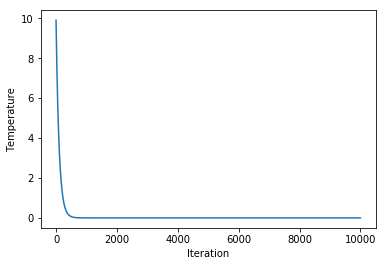

In [201]:
# plot iterations vs temperatures
#temperatures = [initial_temp/float(i + 1) for i in iterations]
temperatures = [10*(0.99)**(float(i+1)) for i in iterations]
plt.plot(iterations, temperatures)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()

# 5.) Annealing pathway over each iteration

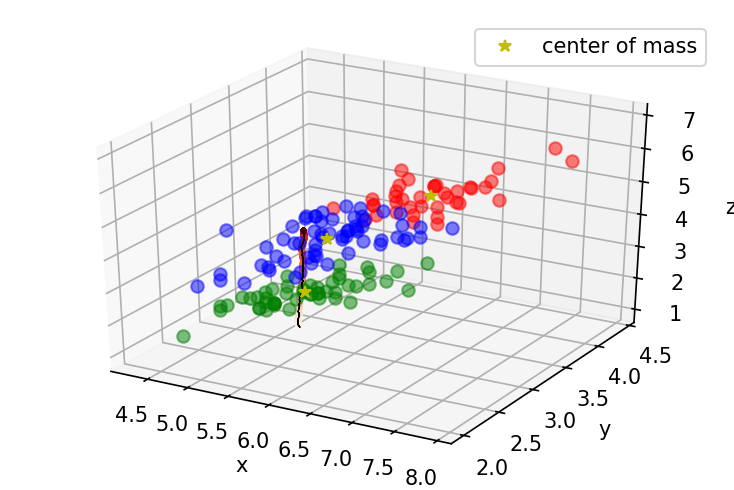

last element of MC simulation:  [5.307115681149296, 3.06664187133196, 2.938779614291905]
calculated cluster center of mass:  [5.006, 3.418, 1.464]
k means center of mass:  [5.9016129  2.7483871  4.39354839 1.43387097]


In [203]:
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

k_max = 5000

candidates = np.array(candidates)

t = np.linspace(1,len(candidates[:,0]),len(candidates[:,0]))

com = [np.mean(data[:,0]), np.mean(data[:,1]), np.mean(data[:,2])]

#ax.plot(X[:,0],X[:,1],X[:,2],'o',alpha=0.5)
ax.plot(cluster1[:,0],cluster1[:,1],cluster1[:,2],'o',color='r',alpha=0.5)
ax.plot(cluster2[:,0],cluster2[:,1],cluster2[:,2],'o',color='g',alpha=0.5)
ax.plot(cluster3[:,0],cluster3[:,1],cluster3[:,2],'o',color='b',alpha=0.5)
ax.plot(candidates[:,0],candidates[:,1],candidates[:,2],color='k',linewidth=0.5)
ax.plot(C[:,0],C[:,1],C[:,2],'o',color='y',marker='*',label='center of mass')
ax.scatter(candidates[:,0],candidates[:,1],candidates[:,2],c=t,cmap = 'Reds',s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()

make_movies=False

if make_movies:
    imagedata = []
    for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("movie%d.png" % ii)
        data = imageio.imread('movie{}.png'.format(ii))
        imagedata.append(data)
    imageio.mimwrite('anneal.mp4', imagedata, format= '.mp4', fps = 20)
plt.show()

print('last element of MC simulation: ',[candidates[k_max-1,0],candidates[k_max-1,1],candidates[k_max-1,2]])
print('calculated cluster center of mass: ',com)
print('k means center of mass: ',C[2])